# AirBnb NYC pricing - Analytics, visualization, and prediction

## Data:
The dataset of the airbnb nyc pricing is taken from the website Kaggle https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data which was updated till last year 2019. This dataset contains the features which are used for effective analysis of data. The data is explored, cleaned and preprocessed. Then the analysis is done and the important insights are visualized using matplotlib and seaborn. Then, the predictive model is built to predict the pricing.

## Import necessary packages and read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_airbnb = pd.read_csv(r"C:\Users\Srividhya\Desktop\Airbnb NYC dataset\AB_NYC_2019.csv")
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Exploration, cleaning and preprocessing

In [3]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

Here, you can see that the "last_review" column should be of datetime format but it is of object datatype. So, it is necessary to change the data type to the required format.

In [4]:
df_airbnb["last_review"] = pd.to_datetime(df_airbnb["last_review"])

In [5]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null datetime64[ns]
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-nu

###### Now, the last review column is in correct data type format.

In [6]:
df_airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [7]:
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are many missing values in the dataset. To handle the missing values:
1. Either the column with the missing values should be dropped, or
2. the missing values should be filled with 0, or
3. they should be filled with the mean or the most frequent value.

In [8]:
df_airbnb.shape

(48895, 16)

In [9]:
df_airbnb.duplicated().sum()
df_airbnb.drop_duplicates(inplace=True)

###### In case of any duplicate values, they are dropped.

###### Since there are much duplicate values in the dataset, the columns "name", "id", "host_name", and "last_review" with the missing values are not considered the most important features in case of analytics and visualization, also prediction.

###### On the other hand, reviews_per_month column is missing lots of values and it is one of the necessary feature. So, the missing values are filled with the mean value of the reviews_per_month column.

In [10]:
df_airbnb.drop(columns=['name', 'id', 'host_name', 'last_review'], axis=1, inplace=True)

In [11]:
df_airbnb['reviews_per_month'].fillna(df_airbnb['reviews_per_month'].mean(),inplace=True)

In [12]:
df_airbnb.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

###### Now, there are no missing values and duplicate values, hence the data is clean.

In [13]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 4.8+ MB


In [14]:
df_airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [15]:
df_airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0


In [16]:
df_airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

## Correlation among the features

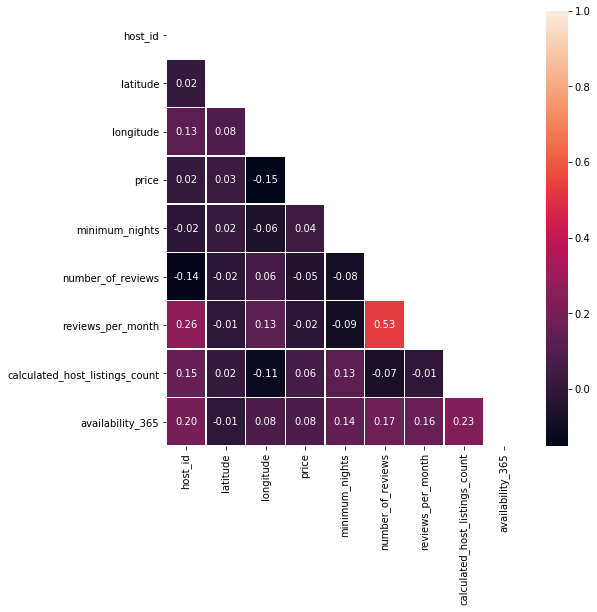

In [17]:
corr_1 = df_airbnb.corr()
fig, ax = plt.subplots(figsize=(8, 8))
dropSelf = np.zeros_like(corr_1)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_1, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

###### The above correlation heatmap shows the relationship among the different features/variables in the dataset. Here, if you notice clearly, there is no one feature that affects the price attribute precisely. Also, the number_of_reviews and reviews_per_month are highly correlated and it is relevant and true because the reviews_per_month makes up the number_of_reviews.

In [18]:
df_airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [19]:
df_airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [20]:
df_airbnb.availability_365.unique()

array([365, 355, 194,   0, 129, 220, 188,   6,  39, 314, 333,  46, 321,
        12,  21, 249, 347, 364, 304, 233,  85,  75, 311,  67, 255, 284,
       359, 269, 340,  22,  96, 345, 273, 309,  95, 215, 265, 192, 251,
       302, 140, 234, 257,  30, 301, 294, 320, 154, 263, 180, 231, 297,
       292, 191,  72, 362, 336, 116,  88, 224, 322, 324, 132, 295, 238,
       209, 328,  38,   7, 272,  26, 288, 317, 207, 185, 158,   9, 198,
       219, 342, 312, 243, 152, 137, 222, 346, 208, 279, 250, 164, 298,
       260, 107, 199, 299,  20, 318, 216, 245, 189, 307, 310, 213, 278,
        16, 178, 275, 163,  34, 280,   1, 170, 214, 248, 262, 339,  10,
       290, 230,  53, 126,   3,  37, 353, 177, 246, 225,  18, 343, 326,
       162, 240, 363, 247, 323, 125,  91, 286,  60,  58, 351, 201, 232,
       258, 341, 244, 329, 253, 348,   2,  56,  68, 360,  76,  15, 226,
       349,  11, 316, 281, 287,  14,  86, 261, 331,  51, 254, 103,  42,
       325,  35, 203,   5, 276, 102,  71,  78,   8, 182,  79,  4

In [21]:
df_airbnb.nunique()

host_id                           37457
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   938
calculated_host_listings_count       47
availability_365                    366
dtype: int64

###### When checking the unique values in all the features, it is clear that only the neighbourhood_group and room_type has the unique values. Let's explore them.

In [22]:
df_airbnb.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [23]:
df_airbnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

### Most listed hosts in the Airbnb

In [24]:
most_host = df_airbnb.host_id.value_counts().head(10)
most_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

###### The above listed host ids are the most listed hosts in the AirBnb. Let's visualize them.

Text(0, 0.5, 'Count')

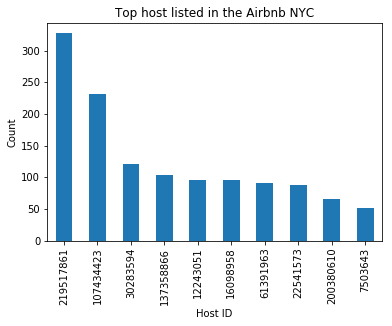

In [25]:
most_host.plot(kind="bar")
plt.title("Top host listed in the Airbnb NYC")
plt.xlabel("Host ID")
plt.ylabel("Count")

## Relationship between neighbourhood_group and availability_365

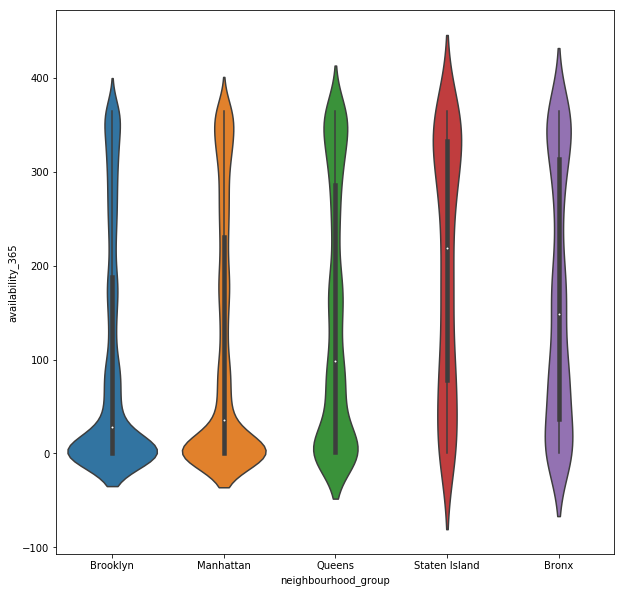

In [26]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=df_airbnb, x="neighbourhood_group", y="availability_365")

This violin plot shows the relationship between the neighbourhood_group and the availability_365.
###### From the insights, it is clearly seen that the "Staten Island" has the highest mean availability value around 220-250 compared to others. Followed by "Bronx" which has its mean availability value between 150 to 200. Then comes the "Queens" with the mean value around 100. The last two groups "Manhattan" and "Brooklyn" have the lowest mean, in order.

## Visualization of NYC with respect to:

### Neighbourhood_group

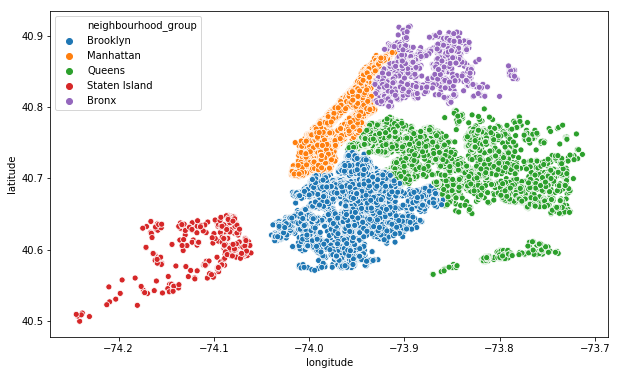

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_airbnb.longitude,df_airbnb.latitude,hue=df_airbnb.neighbourhood_group)
plt.ioff()

### Availability_365

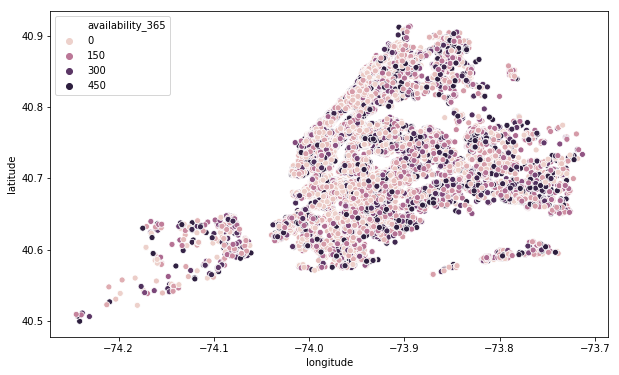

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_airbnb.longitude,df_airbnb.latitude,hue=df_airbnb.availability_365)
plt.ioff()

### Room type

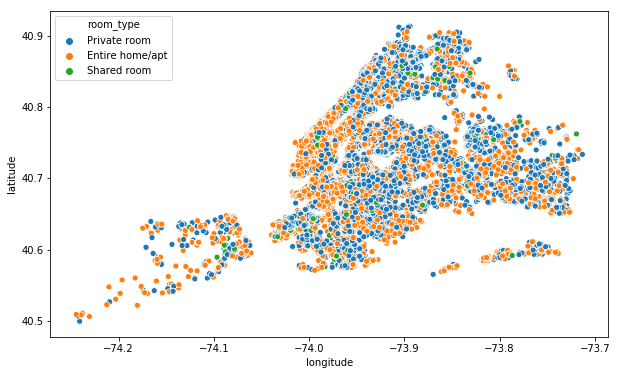

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_airbnb.longitude,df_airbnb.latitude,hue=df_airbnb.room_type)
plt.ioff()

## Relationship between neighbourhood group and price

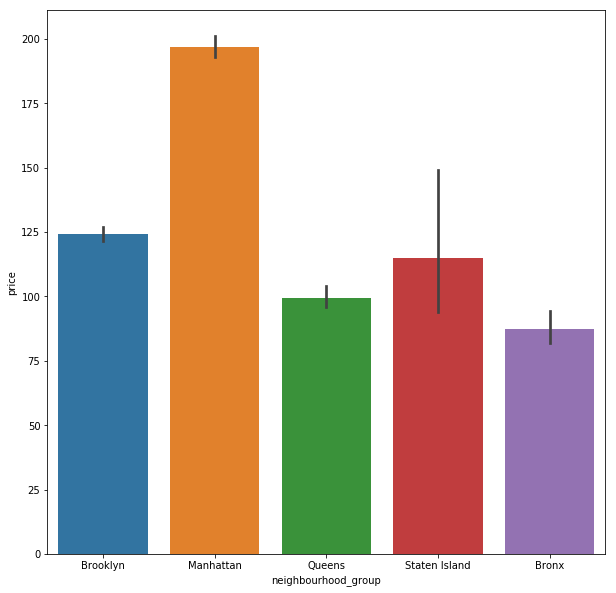

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_airbnb, x='neighbourhood_group', y='price')

From the plot, it is clearly seen that:
1. The "Manhattan" has the highest mean price value around 195 to 200.
2. Then, the "Brooklyn" has the precise mean price value around 125.
3. Followed by "Staten Island" with mean around 120.
4. The "Queens" has the mean value of price nearer to 100.
5. At last, the "Bronx" has the lowest mean price value around 80 to 85.

Hence, it is clear that the Bronx followed by Queens offers the lower price even with the high availability of rooms compared to other groups.

## Importing necessary packages for model development

In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [32]:
df_airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### Getting rid of the unnecessary columns

In [33]:
df_2 = df_airbnb.drop(columns=['host_id', 'price'])
df_2.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

###### While going through the price value, it is found that the value is skewed highly. So, the data needs to be transformed. Here, I consider the log+1 transformation.

In [78]:
df_2['priceLog'] = np.log(df_airbnb.price+1)

In [79]:
df_2.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,priceLog
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.210000,6,365,5.010635
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.380000,2,355,5.420535
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,1.373221,1,365,5.017280
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.640000,1,194,4.499810
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.100000,1,0,4.394449


In [80]:
X, y = df_2.iloc[:,:-1], df_2.iloc[:,-1]

In [81]:
multicollinearity, V = np.linalg.eig(corr_1)
multicollinearity

array([1.72201278, 0.3360805 , 1.46416173, 1.18015482, 0.64320758,
       0.76978359, 1.01975849, 0.99868995, 0.86615057])

### Dealing with the categorical variables

Converting the categorical variables to numerical variables.

In [82]:
X['neighbourhood_group']= X['neighbourhood_group'].astype("category").cat.codes
X['neighbourhood'] = X['neighbourhood'].astype("category").cat.codes
X['room_type'] = X['room_type'].astype("category").cat.codes
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 10 columns):
neighbourhood_group               48895 non-null int8
neighbourhood                     48895 non-null int16
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null int8
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int16(1), int64(4), int8(2)
memory usage: 4.4 MB


In [83]:
X.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,1,9,0.210000,6,365
1,2,127,40.75362,-73.98377,0,1,45,0.380000,2,355
2,2,94,40.80902,-73.94190,1,3,0,1.373221,1,365
3,1,41,40.68514,-73.95976,0,1,270,4.640000,1,194
4,2,61,40.79851,-73.94399,0,10,9,0.100000,1,0


In [84]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

The above step is done to normalize the values between 0 and 1.

In [85]:
y.head()

0    5.010635
1    5.420535
2    5.017280
3    4.499810
4    4.394449
Name: priceLog, dtype: float64

## Train-test splitting of the data

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=50)

## Model building

In [90]:
##Linear Regression
linear_reg = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
linear_reg.fit(X_train, y_train)
prediction1 = linear_reg.predict(X_test)

#Ridge Model
ridge = Ridge(alpha = 0.01, normalize = True)
ridge.fit(X_train, y_train)             
prediction2 = ridge.predict(X_test) 

#Lasso Model
lasso = Lasso(alpha = 0.001, normalize =False)
lasso.fit(X_train, y_train)
prediction3 = lasso.predict(X_test) 

#ElasticNet Model
elasticnet = ElasticNet(alpha = 0.01, normalize=False)
elasticnet.fit(X_train, y_train) 
prediction4= elasticnet.predict(X_test)

## Predicting the accuracy

In [91]:
print("Linear Regression")
print('MAE: ', mean_absolute_error(y_test, prediction1))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, prediction1)))   
print('R2: ', r2_score(y_test, prediction1))
print("\n")

print("Ridge Moodel")
print('MAE: ', mean_absolute_error(y_test, prediction2))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, prediction2)))   
print('R2: ', r2_score(y_test, prediction2))
print("\n")

print("Lasso Model")
print('MAE: ', mean_absolute_error(y_test, prediction3))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, prediction3)))
print('R2: ', r2_score(y_test, prediction3))
print("\n")

print("Elastic net model")
print('MAE: ', mean_absolute_error(y_test,prediction4)) #RMSE
print('RMSE: ', np.sqrt(mean_squared_error(y_test,prediction4))) #RMSE
print('R2: ', r2_score(y_test, prediction4))

Linear Regression
MAE:  0.36530049255073554
RMSE:  0.5069937096405599
R2:  0.462772607514505


Ridge Moodel
MAE:  0.36530610441853034
RMSE:  0.5070286655285695
R2:  0.46269852411819945


Lasso Model
MAE:  0.365282674217441
RMSE:  0.5070321929341084
R2:  0.46269104806438366


Elastic net model
MAE:  0.3655141486448914
RMSE:  0.5074639349616936
R2:  0.46177561261266264


#### All the above four models shows the same amount of accuracy metrics and error metrics. So, it is good to use any of these four models for prediction in future use.

## Transforming back the price value

Since the values are predicted using price_log that is the log+1 transformation of the price attribute, it is necessary to transform back the values to get the predicted prices.

In [96]:
back1 = np.expm1(prediction1)
print(back1)

back2 = np.expm1(prediction2)
print(back2)

back3 = np.expm1(prediction3)
print(back3)

back4 = np.expm1(prediction4)
print(back4)

[ 87.43944874  60.10506014 177.14810576 ...  35.93671939  69.61369882
 154.72797236]
[ 87.73440364  60.44910897 176.57876576 ...  36.32504239  69.90348061
 153.96932121]
[ 87.70038806  60.38208966 177.38271009 ...  36.05099233  69.77247823
 154.12205657]
[ 88.89162295  61.67228046 178.0290348  ...  36.70529908  70.55811516
 151.37834022]


## Conclusion:

Hence, the airbnb dataset is clearly explored, analysed, and visualised. Also, since the price value is skewed, predicting its value is impossible. So, the new value named price_log value is created using log+1 transformation and it is used for prediction. Hence, the predictive models using Linear regression, Lasso, Ridge and Elastic net models are built to predict the values.

### Thank you : )